## Introduction ##
This is an analytical report for world population. There are regions in the world which are highly affected by some of the major issues the world is facing today. For example **life expectancy**, **fertility rate** and **children dying before age of 5**. I am going to explore these areas by analyzing and visualization using the dataset available. In some cases I would try to correlate with the future based on the past trends. 


There are great variations in life expectancy between different parts of the world, mostly caused by differences in public health, medical care, and diet. During the last 200 years, African countries have generally not had the same improvements in mortality rates that have been enjoyed by countries in Asia, Latin America, and Europe. Economic circumstances also affect life expectancy. For example, in the United Kingdom, life expectancy in the wealthiest and richest areas is several years higher than in the poorest areas. Future trends in life expectancy have huge implications for old-age support programs like U.S. Social Security and pension since the cash flow in these systems depends on the number of recipients who are still living (along with the rate of return on the investments or the tax rate in pay-as-you-go systems). With longer life expectancies, the systems see increased cash outflow; if the systems underestimate increases in life-expectancies, they will be unprepared for the large payments that will occur, as humans live longer and longer.

Developed countries usually have a significantly lower fertility rate, often correlated with greater wealth, education, urbanization, or other factors. Mortality rates are low, birth control is understood and easily accessible, and costs are often deemed very high because of education, clothing, feeding, and social amenities. With wealth, contraception becomes affordable. In countries like Iran where contraception was subsidized before the economy accelerated, birth rate also rapidly declined. Further, longer periods of time spent getting higher education often mean women have children later in life.In undeveloped countries on the other hand, families desire children for their labour and as caregivers for their parents in old age. Fertility rates are also higher due to the lack of access to contraceptives, stricter adherence to traditional religious beliefs, generally lower levels of female education, and lower rates of female employment in industry. The total fertility rate for the world has been declining very rapidly since the 1990s.

Globally, under-five mortality rate has decreased by 53%, from an estimated rate of 91 deaths per 1000 live births in 1990 to 43 deaths per 1000 live births in 2015. The reduction of child mortality is one of the most strongly and universally supported development goals. In high-mortality settings, a large proportion of all deaths occur before age 5. Despite considerable progress in reducing child mortality, there remains a large gap between developed and developing countries in the risks of dying before age 5. for instance, during 2000-2005, under-five mortality stood at 9 per 1000 in the more developed regions but at 153 per thousand in the least developed countries.The gap between more developed and the less developed regions is larger in proportional terms for death rates in early childhood than for those in adult ages. Under-five mortality levels are influenced by poverty, education, particularly of mothers; by the availability, accessibility and quality of health services; by environmental risks including access to safe water and sanitation; and by nutrition.






### About the dataset ###

The United States Census Bureau’s International Dataset provides estimates of country populations since 1950 and projections through 2050. Specifically, the data set includes midyear population figures broken down by age and gender assignment at birth. Additionally, they provide time-series data for attributes including fertility rates, birth rates, death rates, and migration rates.

The full documentation is available here. For basic field details, please see the data dictionary.

Note: The U.S. Census Bureau provides estimates and projections for countries and areas that are recognized by the U.S. Department of State that have a population of at least 5,000.

### Analytical Questions: ###


### Question 1 ###
Which countries will have the largest improvements in life expectancy by the year 2050? who has better life expectancy male or female? what is the current status of the male and female life expectancy in year 2017 in the entire world?
### Question 2 ###
What is the age group best for fertility rates? Is the same age group is best in all the continents?
### Question 3 ###
**Hypothesis:** Children are at great risk of dying before age 5 if they are born in African countries.

## Analysis ##
Let's begin exploring the available dataset to answer the questions.

##### Definitions #####
**Life Expectancy:** _Life expectancy is a statistical measure of the average time an organism is expected to live, based on the year of their birth, their current age and other demographic factors including sex._

**Fertility Rate:**_the ratio of live births in an area to the population of that area; expressed per 1000 population per year_

**Total Fertility Rate:**_The total fertility rate (TFR), sometimes also called the fertility rate, absolute/potential natality, period total fertility rate (PTFR) or total period fertility rate (TPFR) of a population is the average number of children that would be born to a woman over her lifetime if:_

_1)She were to experience the exact current age-specific fertility rates (ASFRs) through her lifetime, and_

_2)She were to survive from birth through the end of her reproductive life._

_It is obtained by summing the single-year age-specific rates at a given time._

**ASFRs** _ASFRs can be calculated for single years of age but are often calculated for the seven five-year
age groups covering the reproductive years 15 to 49 (15-19, 20-24, 25-29, 30-34, 35-39, 40-44
and 45-49)_

**Mortality Rate:**_Mortality rate, or death rate,[1] is a measure of the number of deaths (in general, or due to a specific cause) in a particular population, scaled to the size of that population, per unit of time. Mortality rate is typically expressed in units of deaths per 1,000 individuals per year; thus, a mortality rate of 9.5 (out of 1,000) in a population of 1,000 would mean 9.5 deaths per year in that entire population, or 0.95% out of the total._



In [414]:
# Importing all the required packages required/used for the analysis and visualization.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline


#### Question 1:####
Which countries have made the largest improvements in life expectancy? 


In [214]:
# Getting the data set into dataframe df_mortality_life_expectancy
df_mortality_life_expectancy = pd.read_csv('mortality_life_expectancy.csv')

# Looking at the data.
df_mortality_life_expectancy.head(2)


,country_code,country_name,year,infant_mortality,infant_mortality_male,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female,mortality_rate_1to4,mortality_rate_1to4_male,mortality_rate_1to4_female
0,SI,Slovenia,2036,3.39,3.76,3.00,80.90,77.51,84.52,3.93,4.39,3.44,0.54,0.63,0.44
1,SI,Slovenia,2022,3.76,4.22,3.27,79.11,75.58,82.89,4.43,5.02,3.81,0.68,0.80,0.54


In [215]:
# getting a new dataframe for country name, year, life expectancy to calculate the impovement of the countries over  
#  the years from 1950 to 2050. Some countries will have no data from 1950.
df_life_expectancy = df_mortality_life_expectancy[['country_name','year','life_expectancy']].sort_values(
                    ['country_name','year'],ascending=[1,1]).groupby(['country_name'])
# the dataframe stores the group of data together, here in our case it is country wise. Printing two rows.
df_life_expectancy.get_group('United States').head(2)


,country_name,year,life_expectancy
3100,United States,2014,79.54
3090,United States,2015,79.68


In [6]:
# getting dataframe for the max life expectancy for each country and the year. In our case it would be 2050.
df_max_life_expectancy = df_life_expectancy.max()
df_max_life_expectancy.rename(columns={'year':'year_max','life_expectancy':'life_expectancy_max'}, inplace = True)

# printing the kind of data we have in our dataframe
df_max_life_expectancy.head(2)

,year_max,life_expectancy_max
country_name,,
Afghanistan,2050,64.51
Albania,2050,82.32


In [7]:
# getting dataframe for the min life expectancy for each country and the year. In our case it would be the first year 
# from which the data is available.
df_min_life_expectancy = df_life_expectancy.min()
df_min_life_expectancy.rename(columns = {'year':'year_min','life_expectancy':'life_expectancy_min'}, inplace = True)

#printing the kind of data we have in our dataframe
df_min_life_expectancy.head(2)


,year_min,life_expectancy_min
country_name,,
Afghanistan,1979,38.77
Albania,1989,70.17


In [8]:
# getting the current year and expectancy rate for the current year
df_current_life_expectancy = (df_mortality_life_expectancy[['country_name','year','life_expectancy']]
                              [df_mortality_life_expectancy['year']==2017].sort_values(['country_name']))
df_current_life_expectancy.set_index('country_name', inplace = True)
df_current_life_expectancy.rename(columns={'year':'current_year','life_expectancy':'life_expectancy_cur'},inplace=True)

#printing the kind of data we have in our dataframe
df_current_life_expectancy.head(2)


,current_year,life_expectancy_cur
country_name,,
Afghanistan,2017,51.67
Albania,2017,78.47


In [9]:
# concatenating all three dataframes(max, min and current) created above to calculate the improvement in life 
# expectance for each country and the number of years it took to reach(year 2050) at max life expectancy.
df_life_expectancy_improvement = (pd.concat([df_min_life_expectancy, df_max_life_expectancy, 
                                             df_current_life_expectancy], axis = 1))
df_life_expectancy_improvement['life_expectancy_diff'] = (df_life_expectancy_improvement['life_expectancy_max']
                                                        - df_life_expectancy_improvement['life_expectancy_min'])
df_life_expectancy_improvement['year_diff'] = (df_life_expectancy_improvement['year_max']
                                              - df_life_expectancy_improvement['year_min'])
df_life_expectancy_improvement.sort_values(['life_expectancy_diff'], ascending = [0],inplace = True)

# Printing the best 5 performers of the life expectancy.
df_life_expectancy_improvement.head(5)


,year_min,life_expectancy_min,year_max,life_expectancy_max,current_year,life_expectancy_cur,life_expectancy_diff,year_diff
country_name,,,,,,,,
Rwanda,1978,10.01,2050,71.96,2017,60.51,61.95,72
Cambodia,1962,16.20,2050,74.70,2017,64.87,58.50,88
Somalia,1975,17.18,2050,65.50,2017,52.77,48.32,75
Haiti,1971,29.47,2050,73.69,2017,64.20,44.22,79
Guinea,1955,30.74,2050,73.23,2017,61.03,42.49,95


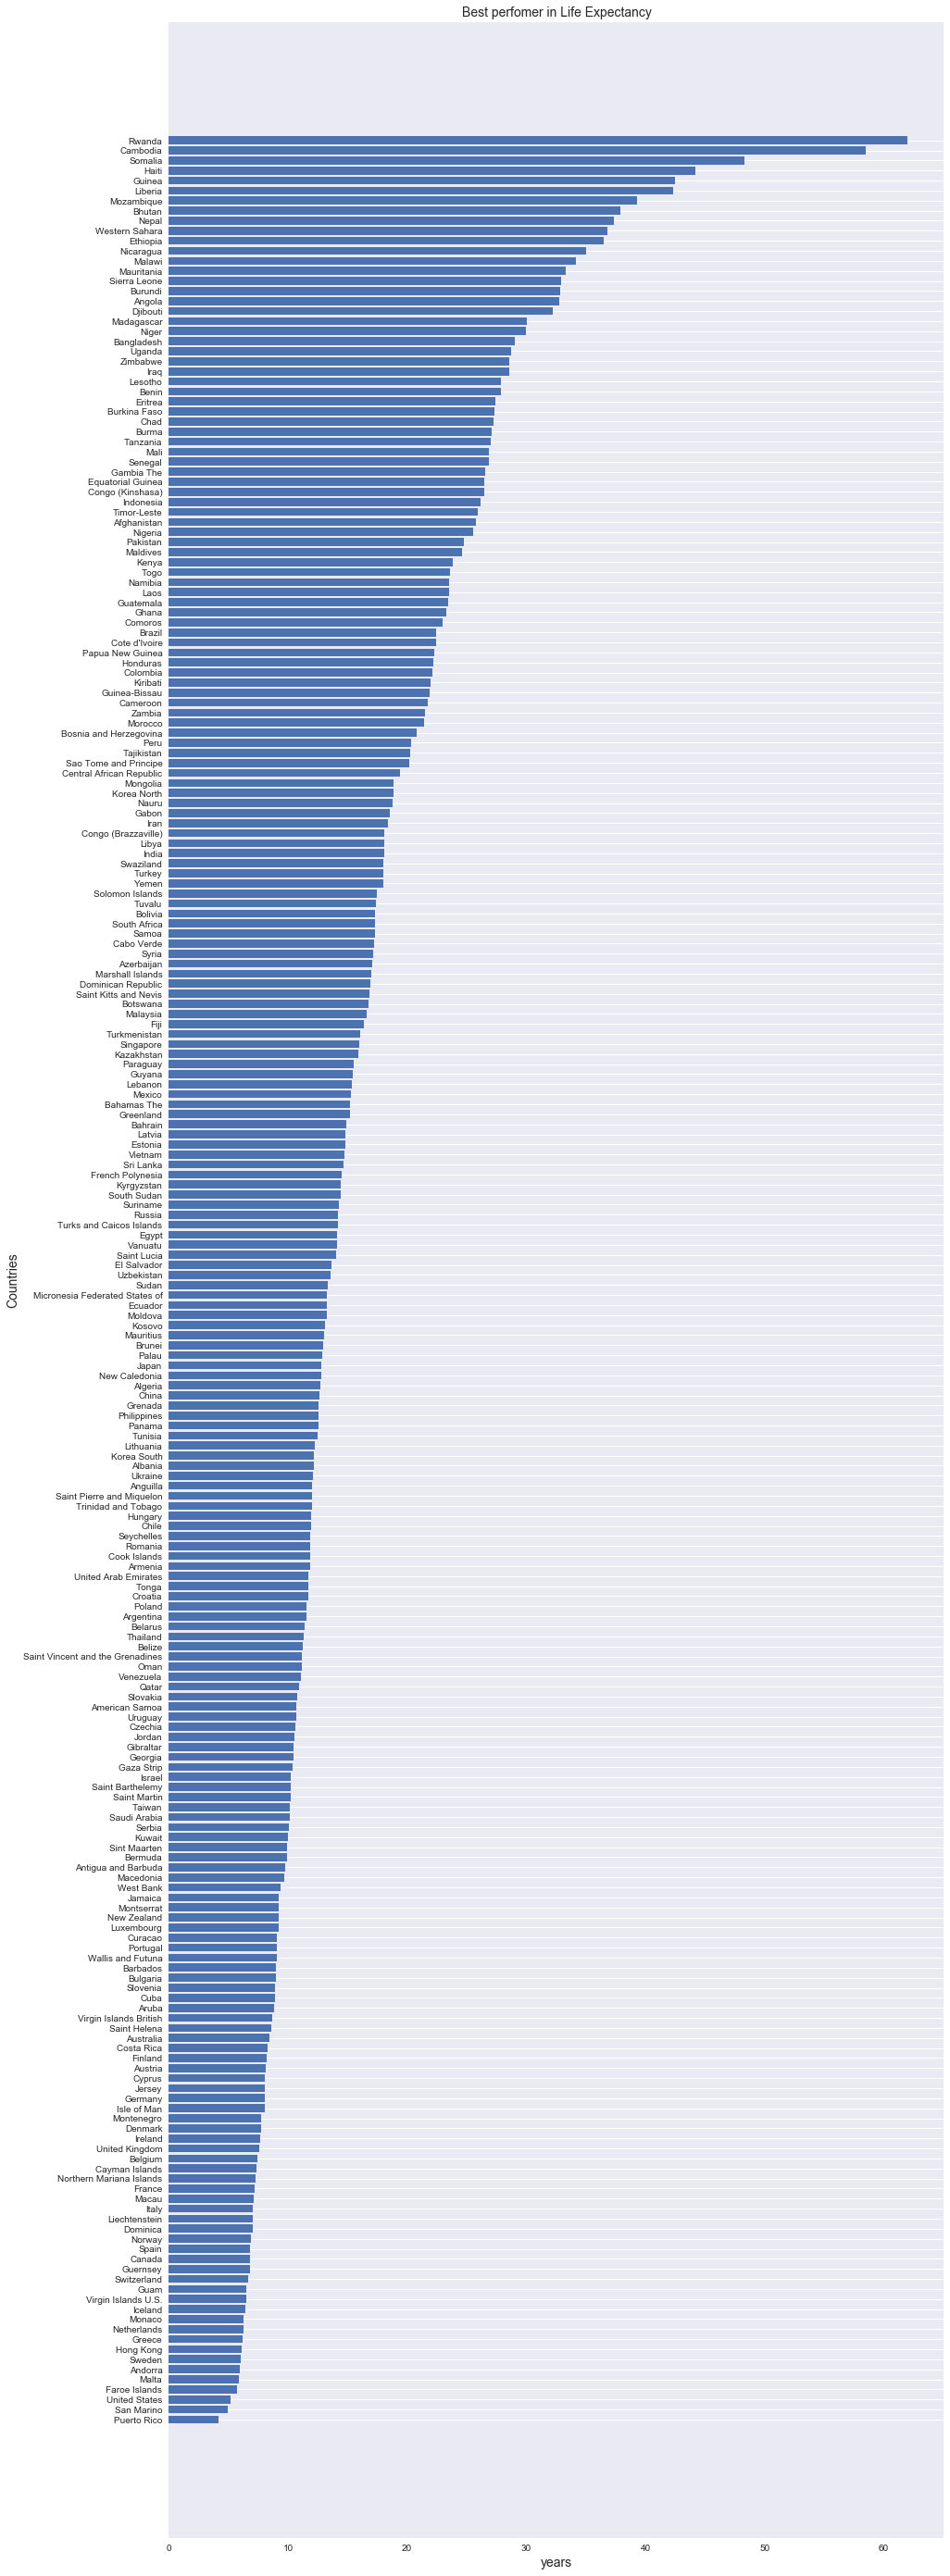

In [464]:
#graph to represent the best performers in the life expectancy country wise. 

#ascending order of the dataframe
df_life_expectancy_improvement.sort_values(['life_expectancy_diff'], ascending = [1],inplace = True)
country_name = df_life_expectancy_improvement.index

y_pos = np.arange(len(country_name))

plt.figure(figsize=(15,50))

#creating a horizonal bar graph.
plt.barh(y_pos,df_life_expectancy_improvement['life_expectancy_diff'], align = 'center')
plt.yticks(y_pos,country_name)
plt.title('Best perfomer in Life Expectancy', fontsize = 14)
plt.xlabel('years', fontsize = 14)
plt.ylabel('Countries', fontsize =14)
plt.grid(axis = 'x')
plt.show()



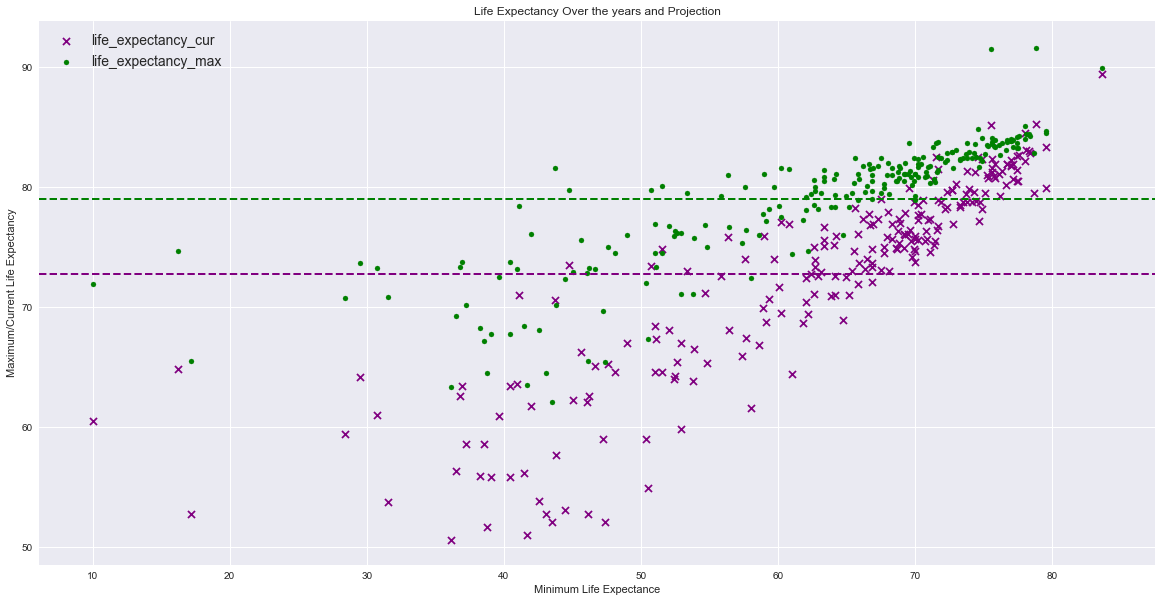

In [219]:
#graph to show that these current life expectancy and life expectancy at 2050 relation. all the countries are
#improving

plt.figure(figsize=(20,10))
plt.scatter(x=df_life_expectancy_improvement['life_expectancy_min'], 
            y=df_life_expectancy_improvement['life_expectancy_cur'],
           color = 'purple', marker = 'x', s=50)
plt.scatter(x=df_life_expectancy_improvement['life_expectancy_min'], 
            y=df_life_expectancy_improvement['life_expectancy_max'],
           color = 'green', marker = 'o', s=25)
plt.axhline(df_life_expectancy_improvement['life_expectancy_cur'].mean(),color='purple',linestyle='dashed',linewidth=2)
plt.axhline(df_life_expectancy_improvement['life_expectancy_max'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.legend(loc = 'best', fontsize = 14)
plt.xlabel('Minimum Life Expectance')
plt.ylabel('Maximum/Current Life Expectancy')
plt.title('Life Expectancy Over the years and Projection')
plt.show()

The above calculations and graphs shows the improvement of all the countries(228) in life expectancy. Top of the list is Rawanda which has great improvement from 10 years to 60 years. And by the end of the year 2050 it is expected to  reach around 70 years. We can also see that the developed countries like USA, UK have very steady improvement because of the access to life saving medicines. Life expectancy is also likely to be affected by exposure to high levels of highway air pollution or industrial air pollution. This is one way that occupation can have a major effect on life expectancy. Coal miners (and in prior generations, asbestos cutters) often have lower life expediencies than average life expediencies. Other factors affecting an individual's life expectancy are genetic disorders, drug use, tobacco smoking, excessive alcohol consumption, obesity, access to health care, diet and exercise.
The life expectancy for all the countries in the world is improving because of the development in medical science. The doted horizontal lines represent the average life expectancy in years 2017 & 2050


#### Question 1, 2nd part ####
who has better life expectancy male or female? what is the current status of the male and female life expectancy in year 2017 in the entire world?


In [12]:
# getting new dataframe for male and female life expectance
df_life_expectancy_all = df_mortality_life_expectancy[
    ['country_name','year','life_expectancy','life_expectancy_male','life_expectancy_female']]
df_life_expectancy_all.head(2)

,country_name,year,life_expectancy,life_expectancy_male,life_expectancy_female
0,Slovenia,2036,80.90,77.51,84.52
1,Slovenia,2022,79.11,75.58,82.89


In [225]:
# check if male has the better expectancy.
df_chk_expectancy_male = df_life_expectancy_all[
    ['country_name','year','life_expectancy','life_expectancy_male','life_expectancy_female']][
    df_life_expectancy_all['life_expectancy_male'] >= df_life_expectancy_all['life_expectancy_female']]
male_better_expectancy, col = df_chk_expectancy_male.shape

# printing the number of times life expectancy of males are better than female.
print('There are {} instnaces/country where male has better life expectancy than female.'.format(
    male_better_expectancy))

There are 235 instnaces where male has better life expectancy than female.


In [226]:
# check if female has the better expectancy.
df_chk_expectancy_female = df_life_expectancy_all[
    ['country_name','year','life_expectancy','life_expectancy_male','life_expectancy_female']][
    df_life_expectancy_all['life_expectancy_female'] >= df_life_expectancy_all['life_expectancy_male']]
female_better_expectancy,col = df_chk_expectancy_female.shape

# printing the number of times life expectancy of females are better than male.
print('There are {} instnaces/country where male has better life expectancy than female.'.format(
    female_better_expectancy))

There are 14872 instnaces/country where male has better life expectancy than female.


### 2017 Status of male/female expectancy in the world. ###

In [15]:
# getting the dataframe for the current life expectancy in the year 2017.
df_life_expectancy_all_2017 = df_life_expectancy_all[
    ['country_name','year','life_expectancy','life_expectancy_male','life_expectancy_female']][
    df_life_expectancy_all['year']==2017]
df_life_expectancy_all_2017.head(2)

,country_name,year,life_expectancy,life_expectancy_male,life_expectancy_female
56,Slovenia,2017,78.34,74.75,82.16
119,Latvia,2017,74.69,70.13,79.48


In [230]:
df_chk_expectancy_male_2017 = df_life_expectancy_all_2017[
    ['country_name','year','life_expectancy','life_expectancy_male','life_expectancy_female']][
    df_life_expectancy_all_2017['life_expectancy_male'] >= df_life_expectancy_all_2017['life_expectancy_female']]
male_better_expectancy_2017, col = df_chk_expectancy_male_2017.shape
df_chk_expectancy_male_2017.head()

,country_name,year,life_expectancy,life_expectancy_male,life_expectancy_female
2087,Swaziland,2017,52.09,52.70,51.46
5222,Montserrat,2017,74.60,75.94,73.19
14446,Botswana,2017,54.90,56.75,53.00


In [231]:
df_chk_expectancy_female_2017 = df_life_expectancy_all_2017[
    ['country_name','year','life_expectancy','life_expectancy_male','life_expectancy_female']][
    df_life_expectancy_all_2017['life_expectancy_female'] >= df_life_expectancy_all_2017['life_expectancy_male']]
female_better_expectancy_2017, col = df_chk_expectancy_female_2017.shape
df_chk_expectancy_female_2017.head(2)

,country_name,year,life_expectancy,life_expectancy_male,life_expectancy_female
56,Slovenia,2017,78.34,74.75,82.16
119,Latvia,2017,74.69,70.13,79.48


In [232]:
print('In year 2017, there are only {} countries who has betther life expectancy for male than female.'.format(
male_better_expectancy_2017))

In year 2017, there are only 3 countries who has betther life expectancy for male than female.


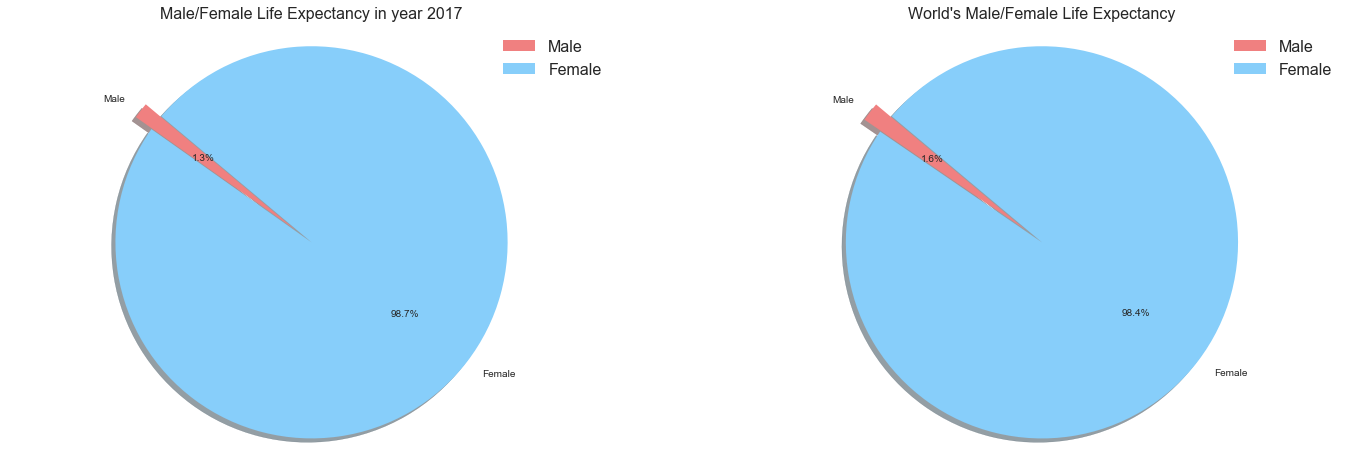

In [452]:
#plt.subplots(figsize = (10,5))

#Creating a pie chart for depecting overall life expectancy of male and female.
plt.figure(figsize = (24,8))
plt.subplot(1,2,2)
labels = 'Male', 'Female'
size = [male_better_expectancy,female_better_expectancy]
color = ['lightcoral','lightskyblue']
explode = (0,0.1)

plt.pie(size, explode=explode, labels=labels, colors=color,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels,loc='best', fontsize=16)
plt.title("World's Male/Female Life Expectancy", fontsize=16)
plt.axis('equal')
#plt.show()


#Creating a pie chart for depecting overall life expectancy of male and female in year 2017.

plt.subplot(1,2,1)
labels = 'Male', 'Female'
size = [male_better_expectancy_2017,female_better_expectancy_2017]
color = ['lightcoral','lightskyblue']
explode = (0,0.1)

plt.pie(size, explode=explode, labels=labels, colors=color,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels,loc='best', fontsize=16)
plt.title('Male/Female Life Expectancy in year 2017', fontsize=16)
plt.axis('equal')
plt.show()
#try scatter plot


The above analysis shows the dominance of female life expectany over male in the world. In the uterus, male fetuses have a higher mortality rate (babies are conceived in a ratio estimated to be from 107 to 170 males to 100 females. Among the smallest pre-mature babies (those under 2 pounds or 900 g), females again have a higher survival rate. At the other extreme, about 90% of individuals aged 110 are female. If the trends are to be believed, even in the future women will continue to enjoy better life expectancy. The reasons for this are not entirely certain. Traditional arguments tend to favor sociology-environmental factors: historically, men have generally consumed more tobacco, alcohol and drugs than women in most societies, and are more likely to die from many associated diseases such as lung cancer, tuberculosis and cirrhosis of the liver.


**p-Value test to confirm that the difference in male and female life expectancy is real and not due to the sample variance.**

In [467]:
#df_life_expectancy_all.head(2)
# creating dataframe to test p value will have only two column for male and female and years will be indexed.
df_test = df_life_expectancy_all[['year','life_expectancy_male','life_expectancy_female']]
df_test.head(2)

,year,life_expectancy_male,life_expectancy_female
0,2036,77.51,84.52
1,2022,75.58,82.89


In [481]:
df_test_index = df_test.set_index('year')
#df_test_index = df_test_year_index.groupby(['year'])
df_test_index.head(2)

,life_expectancy_male,life_expectancy_female
year,,
2036,77.51,84.52
2022,75.58,82.89


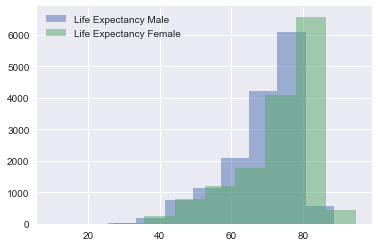

In [500]:
# Creating histograme for the two variables male life expectancy and female life expectancy rates 
plt.hist(df_test_index['life_expectancy_male'], alpha = .5, label = 'Life Expectancy Male')
plt.hist(df_test_index['life_expectancy_female'], alpha = .5, label = 'Life Expectancy Female')
plt.legend(loc = 'best')
plt.show()

In [486]:
# now calculate the mean and sandard deviation of both the samples.
print (" The mean of male life expectancy rate = {}".format(
    df_test_index['life_expectancy_male'].mean()))

print (" The mean of female life expectancy rate = {}".format(
    df_test_index['life_expectancy_female'].mean()))

print (" The standard deviation male life expectancy rate = {}".format(
    df_test_index['life_expectancy_male'].std()))

print (" The standard deviation of female life expectancy rate = {}".format(
    df_test_index['life_expectancy_female'].std()))

# calculate the difference(diff_FM -> difference of male and female) of mean of two variables and print it.

diff_FM = df_test_index['life_expectancy_female'].mean() - df_test_index['life_expectancy_male'].mean()
print ("The difference of means = {}".format(diff_FM))

 The mean of male life expectancy rate = 68.8825943333778
 The mean of female life expectancy rate = 73.85216867469846
 The standard deviation male life expectancy rate = 10.272983130123192
 The standard deviation of female life expectancy rate = 11.291039266439025
The difference of means = 4.969574341320666


In [498]:
# Next, calculate the standard error of the difference of the means. 
#First, create an array with the size of each variable and another with the standard deviation of each variable.

size_FM = np.array([len(df_test_index['life_expectancy_male']), len(df_test_index['life_expectancy_female'])])
sd_FM = (np.array([df_test_index['life_expectancy_male'].std(), 
                df_test_index['life_expectancy_female'].std()]))

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 

diff_se_FM = sum(sd_FM ** 2 / size_FM) ** .5

#The difference between the means divided by the standard error: T-value.  
print ("T-value = {}".format(diff_FM/diff_se_FM))

T-value = 40.012501373060026


In [499]:
from scipy.stats import ttest_ind
print(ttest_ind(df_test_index['life_expectancy_female'], df_test_index['life_expectancy_male'],
                equal_var = False))

Ttest_indResult(statistic=40.012501373065462, pvalue=0.0)


**p-value is smaller than 0.05**, hence we can say that the difference is real and not due to the variance in sample.

### Question 2 ###
What is the age group best for fertility rates? Is the same age group is best in all the continents?


In [19]:
#This analysis is based on continents hence we need continent in our dataset.
df_country_continent = pd.read_csv('country_continent.csv')
df_country_continent.drop(df_country_continent.columns[[0,1,3]], axis=1, inplace = True)
df_country_continent.head(2)

,country_name,continent
0,Afghanistan,Asia
1,Albania,Europe


In [20]:
# get the fertility dataframe
df_age_specific_fertility_rates = pd.read_csv('age_specific_fertility_rates.csv')
df_age_specific_fertility_rates.head(2)

,country_code,country_name,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate,gross_reproduction_rate,sex_ratio_at_birth
0,SI,Slovenia,2036,8.5,60.2,112.0,86.3,32.0,8.8,3.7,1.5555,0.7529,1.0660
1,SI,Slovenia,2022,7.5,56.4,106.1,75.5,26.7,6.4,2.3,1.4110,0.6829,1.0661


In [21]:
#merging the continent column to the fertility_rates dataframe, below codes should remais commented else it would 
#create now merged dataframe each time it gets executed.
#df_age_specific_fertility_rates = (df_age_specific_fertility_rates.merge(df_country_continent,
 #                                                                   how = 'left', on = 'country_name'))
#df_age_specific_fertility_rates.drop(df_age_specific_fertility_rates.columns[[13,14]], axis=1, inplace = True)

# After merging the dataset looks like below.
df_age_specific_fertility_rates.head(2)

,country_code,country_name,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate,gross_reproduction_rate,sex_ratio_at_birth,continent
0,SI,Slovenia,2036,8.5,60.2,112.0,86.3,32.0,8.8,3.7,1.5555,0.7529,1.0660,Europe
1,SI,Slovenia,2022,7.5,56.4,106.1,75.5,26.7,6.4,2.3,1.4110,0.6829,1.0661,Europe


In [22]:
# variable to hold the continent name.
continent_names = df_country_continent['continent'].unique()
continent_names

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [23]:

# create a dataframe with the data only till year 2017.

df_age_specific_fertility_rates_till_2017 = df_age_specific_fertility_rates[
    ['continent','country_name','year','fertility_rate_15_19','fertility_rate_20_24',
    'fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44',
    'fertility_rate_45_49','total_fertility_rate']][
    df_age_specific_fertility_rates['year']<=2017]
# Checking the data
df_age_specific_fertility_rates_till_2017.head(2)

,continent,country_name,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate
15,Europe,Slovenia,1992,19.3,102.6,90.3,39.1,12.1,2.7,0.2,1.3304
31,Europe,Slovenia,1991,21.1,112.1,95.1,40.0,13.5,3.1,0.1,1.4227


In [449]:
df_best_age_group = df_age_specific_fertility_rates_till_2017[['fertility_rate_15_19','fertility_rate_20_24',
    'fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44',
    'fertility_rate_45_49','total_fertility_rate']]
df_best_age_group.shape

(7582, 8)

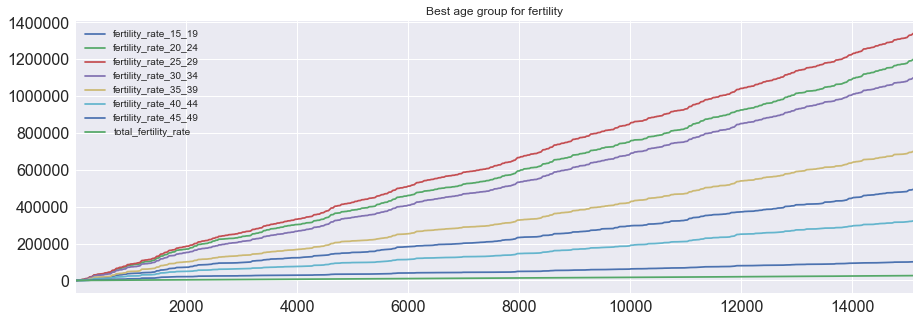

In [453]:
# Graph to show the best age group for fertility rate all over the world.
#df_best_age_group = df_best_age_group.cumsum() ##cumsum is cumulative sum.
plt.figure()
df_best_age_group.plot(title = 'Best age group for fertility',figsize=(15,5), fontsize = 16)
plt.show()


The calculations and the graph clearly shows that fertility rate of the age group 25-29 is best. I had to use the cumulative sum to have the clear graph. Since the data is large, cumulative sum groups the values which gives larger interval. The second best age group for the fertility is 20-24 and we should see the same pattern as above in all the continents.


#### Question 2, 2nd part ####
Is the same age group is best in all the continents?


In [26]:
# need to group dataset into continents.
df_age_specific_fertility_rates_till_2017 = (df_age_specific_fertility_rates_till_2017.groupby(
                                            df_age_specific_fertility_rates_till_2017['continent']))
                              

In [455]:
df_fertility_rate_asia.head = df_age_specific_fertility_rates_till_2017.get_group('Asia')
df_fertility_rate_asia.head(2)


,continent,country_name,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate
138,Asia,Mongolia,1990,45.5,269.6,272.8,195.6,117.4,46.5,12.7,4.80
154,Asia,Mongolia,1989,44.3,271.0,283.2,200.2,118.9,50.4,13.9,4.91


In [45]:
df_age_group_asia = df_fertility_rate_asia[['fertility_rate_15_19','fertility_rate_20_24',
    'fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44',
    'fertility_rate_45_49','total_fertility_rate']]
df_age_group_asia.head(2)


,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate
138,45.5,269.6,272.8,195.6,117.4,46.5,12.7,4.80
154,44.3,271.0,283.2,200.2,118.9,50.4,13.9,4.91


In [29]:
df_fertility_rate_Europe = df_age_specific_fertility_rates_till_2017.get_group('Europe')
df_fertility_rate_Europe.shape


(1438, 11)

In [46]:
df_age_group_Europe = df_fertility_rate_Europe[['fertility_rate_15_19','fertility_rate_20_24',
    'fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44',
    'fertility_rate_45_49','total_fertility_rate']]
df_age_group_Europe.head(2)


,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate
15,19.3,102.6,90.3,39.1,12.1,2.7,0.2,1.3304
31,21.1,112.1,95.1,40.0,13.5,3.1,0.1,1.4227


In [31]:
df_fertility_rate_Africa = df_age_specific_fertility_rates_till_2017.get_group('Africa')
df_fertility_rate_Africa.shape


(2250, 11)

In [47]:
df_age_group_Africa = df_fertility_rate_Africa[['fertility_rate_15_19','fertility_rate_20_24',
    'fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44',
    'fertility_rate_45_49','total_fertility_rate']]
df_age_group_Africa.head(2)


,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate
200,66.0,141.6,177.4,167.5,117.1,71.3,31.2,3.86
201,67.8,144.1,179.3,169.8,119.6,73.2,32.2,3.93


In [33]:
df_fertility_rate_NA = df_age_specific_fertility_rates_till_2017.get_group('North America')
df_fertility_rate_NA.shape


(1195, 11)

In [48]:
df_age_group_NA = df_fertility_rate_NA[['fertility_rate_15_19','fertility_rate_20_24',
    'fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44',
    'fertility_rate_45_49','total_fertility_rate']]
df_age_group_NA.head(2)


,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate
352,14.6,67.3,110.1,85.2,35.6,12.2,1.9,1.6342
362,33.3,106.3,132.0,89.2,43.3,14.6,2.2,2.1048


In [35]:
df_fertility_rate_SA = df_age_specific_fertility_rates_till_2017.get_group('South America')
df_fertility_rate_SA.shape


(479, 11)

In [49]:
df_age_group_SA = df_fertility_rate_SA[['fertility_rate_15_19','fertility_rate_20_24',
    'fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44',
    'fertility_rate_45_49','total_fertility_rate']]
df_age_group_SA.head(2)


,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate
551,101.2,187.9,171.2,124.6,73.7,27.3,5.3,3.456
567,102.2,191.4,175.2,128.0,75.8,28.1,5.4,3.530


In [37]:
df_fertility_rate_Oceania = df_age_specific_fertility_rates_till_2017.get_group('Oceania')
df_fertility_rate_Oceania.shape


(617, 11)

In [50]:
df_age_group_Oceania = df_fertility_rate_Oceania[['fertility_rate_15_19','fertility_rate_20_24',
    'fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44',
    'fertility_rate_45_49','total_fertility_rate']]
df_age_group_Oceania.head(2)


,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate
753,69.0,196.7,210.0,155.0,77.1,31.2,4.6,3.7180
769,72.1,203.6,214.7,158.1,79.1,32.2,4.7,3.8221


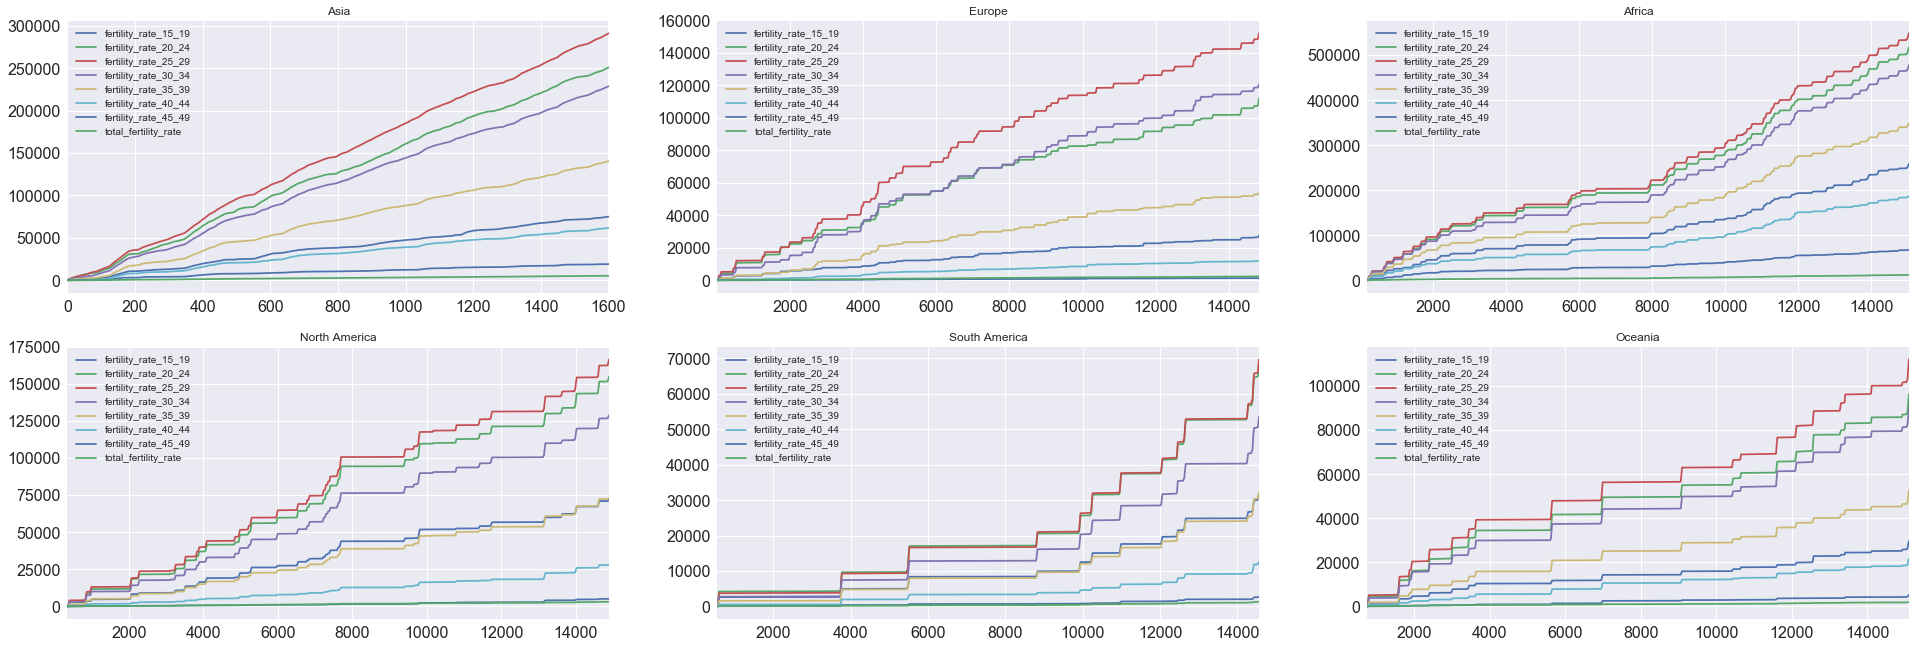

In [446]:
# subplot for all the continents to find out the best age group with the fertility rate.
#df_age_group_asia = df_age_group_asia.cumsum()
#df_age_group_Europe = df_age_group_Europe.cumsum()
#df_age_group_Africa = df_age_group_Africa.cumsum()
#df_age_group_NA = df_age_group_NA.cumsum()
#df_age_group_SA = df_age_group_SA.cumsum()
#df_age_group_Oceania = df_age_group_Oceania.cumsum()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(33,11))
df_age_group_asia.plot(title = 'Asia', ax=axes[0,0], fontsize = 16)
df_age_group_Europe.plot(title = 'Europe', ax=axes[0,1],fontsize = 16)
df_age_group_Africa.plot(title = 'Africa', ax = axes[0,2],fontsize = 16)
df_age_group_NA.plot(title = 'North America',ax = axes[1,0],fontsize = 16)
df_age_group_SA.plot(title = 'South America', ax= axes[1,1],fontsize = 16)
df_age_group_Oceania.plot(title = 'Oceania', ax = axes[1,2],fontsize = 16)
plt.show()


As expected, the age group 25-29 is best age group for the fertility rate in all the continents. However I find two interesting patterns looking at the graph above which are as below:

1) In Europe the second best age group for the fertility rate is 30-34, which is different from all other continents. This is due to the fact that in developed countries longer periods of time spent getting higher education often mean women have children later in life. Female labor participation rate also has substantial negative impact on fertility.

2) In South America, the age groups 20-24 and 25-29 both are almost similar.Let's have a look at the below graph to check if this is true. Will compare  only these two age groups in South America region.


In [348]:
df_age_specific_fertility_rates.head(2)


,country_code,country_name,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate,gross_reproduction_rate,sex_ratio_at_birth,continent
year,,,,,,,,,,,,,
2036,SI,Slovenia,8.5,60.2,112.0,86.3,32.0,8.8,3.7,1.5555,0.7529,1.0660,Europe
2022,SI,Slovenia,7.5,56.4,106.1,75.5,26.7,6.4,2.3,1.4110,0.6829,1.0661,Europe


In [349]:
df_age_group_SA_similar_age_group = df_age_specific_fertility_rates[['fertility_rate_20_24',
    'fertility_rate_25_29']][df_age_specific_fertility_rates['continent'] == 'South America']
df_age_group_SA_similar_age_group.head(2)


,fertility_rate_20_24,fertility_rate_25_29
year,,
2036,87.8,115.6
2021,109.6,113.5


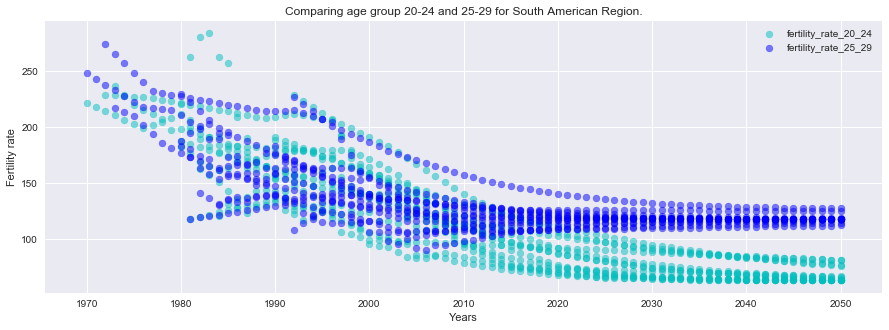

In [350]:
plt.figure(figsize=(15,5))
#df_age_group_SA_similar_age_group['fertility_rate_20_24'].plot(kind = 'line')
#df_age_group_SA_similar_age_group.plot.bar(figsize=(15,5))
plt.scatter(df_age_group_SA_similar_age_group.index,df_age_group_SA_similar_age_group['fertility_rate_20_24'],
            color = 'c', alpha = .5)
plt.scatter(df_age_group_SA_similar_age_group.index,df_age_group_SA_similar_age_group['fertility_rate_25_29'],
            color = 'b', alpha = .5)
plt.title('Comparing age group 20-24 and 25-29 for South American Region.')
plt.legend(loc = 'best')
plt.xlabel('Years')
plt.ylabel('Fertility rate')
plt.show()

The above analysis shows that the two(20-24 and 25-29) age groups are almost similar across the South Americal countries since late 80's to year 2005. After 2005 there is growing difference which is visible on the graph. If this trend continues there will be significat difference in fertility rate of those two age groups by 2050. This gap would be bigger because of the drop in fertility rate of the age group 20-24.


### Hypothesis ###
**Children are at great risk of dying before age 5 if they are born in African countries.**


In [376]:
# get the dataframe for the African continents.
#df_country_continent
#df_mortality_life_expectancy.head(2)
#creating a dataframe to hold the 
df = df_mortality_life_expectancy[['country_name','year','mortality_rate_under5','mortality_rate_under5_male',
                                 'mortality_rate_under5_female']]
df['year'].min()


1950

In [363]:
# mearging with continent data frame
#df_mortality_under5 = (df.merge(df_country_continent, how = 'left', on = 'country_name'))
df_mortality_under5 = df_mortality_under5.groupby(['continent'])

In [208]:
#  dataframe for Africa continent.
#df_mortality_under5_Africa = df_mortality_under5.get_group('Africa')
#df_mortality_under5_Africa.head(2)
#  dataframe for Africa continent for the year 2017.
#df_mortality_under5_Africa_2017 = (df_mortality_under5_Africa[df_mortality_under5_Africa['year']==2017])

#calculation of max, min and average(mortality rate under 5) of all the countries in Africa for male, femal and all.
# These calculation is done to give a clear numbers and is done only for african continent.
under5_Africa_max = df_mortality_under5_Africa_2017['mortality_rate_under5'].max()
under5_Africa_min = df_mortality_under5_Africa_2017['mortality_rate_under5'].min()
under5_Africa_avg = df_mortality_under5_Africa_2017['mortality_rate_under5'].mean()

under5_male_Africa_max = df_mortality_under5_Africa_2017['mortality_rate_under5_male'].max()
under5_male_Africa_min = df_mortality_under5_Africa_2017['mortality_rate_under5_male'].min()
under5_male_Africa_avg = df_mortality_under5_Africa_2017['mortality_rate_under5_male'].mean()

under5_female_Africa_max = df_mortality_under5_Africa_2017['mortality_rate_under5_female'].max()
under5_female_Africa_min = df_mortality_under5_Africa_2017['mortality_rate_under5_female'].min()
under5_female_Africa_avg = df_mortality_under5_Africa_2017['mortality_rate_under5_female'].mean()

print('Maximum mortality rate for Africa continent= {}'.format(under5_Africa_max))
print('Minimum mortality rate for Africa continent= ',under5_Africa_min)
print('Average mortality rate for Africa continent= ' ,under5_Africa_avg)
print('Maximum male mortality rate for Africa continent= ' ,under5_male_Africa_max)
print('Maximum male mortality rate for Africa continent= ' ,under5_male_Africa_min)
print('Average male mortality rate for Africa continent= ' ,under5_male_Africa_avg)
print('Maximum female mortality rate for Africa continent= ' ,under5_female_Africa_max)
print('Minimum female mortality rate for Africa continent= ' ,under5_female_Africa_min)
print('Avegrage female mortality rate for Africa continent= ' ,under5_female_Africa_avg)


Maximum mortality rate for Africa continent= 153.34
Minimum mortality rate for Africa continent=  11.07
Average mortality rate for Africa continent=  74.40035714285715
Maximum male mortality rate for Africa continent=  164.11
Maximum male mortality rate for Africa continent=  11.59
Average male mortality rate for Africa continent=  80.13267857142856
Maximum female mortality rate for Africa continent=  142.63
Minimum female mortality rate for Africa continent=  9.05
Avegrage female mortality rate for Africa continent=  68.48089285714285


In [377]:
#df_mortality_under5_Africa_last_50years = (df_mortality_under5_Africa[df_mortality_under5_Africa['year']<=2017])
df_mortality_under5_Africa['year'].min()


1950

In [187]:
#getting data for all the countries in Asia for all the years.
df_mortality_under5_Asia = df_mortality_under5.get_group('Asia')

# dataframe for Asia continent for the year 2017.
df_mortality_under5_Asia_2017 = (df_mortality_under5_Asia[['country_name','mortality_rate_under5',
                                'mortality_rate_under5_male','mortality_rate_under5_female']]
                                 [df_mortality_under5_Asia['year']==2017])

#Resting the index
df_mortality_under5_Asia_2017 = df_mortality_under5_Asia_2017.set_index('country_name')

#printing the data to check if we have the correct dataframe.
df_mortality_under5_Asia_2017.head(2)

,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female
country_name,,,
Mongolia,25.24,28.95,21.33
Russia,8.43,9.52,7.28


In [174]:
#getting data for all the countries in Europe for all the years.
df_mortality_under5_Europe = df_mortality_under5.get_group('Europe')

# dataframe for Europe continent for the year 2017.
df_mortality_under5_Europe_2017 = (df_mortality_under5_Europe[['country_name','mortality_rate_under5',
                                'mortality_rate_under5_male','mortality_rate_under5_female']]
                                 [df_mortality_under5_Europe['year']==2017])

#Resting the index
df_mortality_under5_Europe_2017 = df_mortality_under5_Europe_2017.set_index('country_name')

#printing the data to check if we have the correct dataframe.
df_mortality_under5_Europe_2017.head(2)


,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female
country_name,,,
Slovenia,4.68,5.32,3.99
Latvia,6.46,7.09,5.82


In [177]:
#getting data for all the countries in North America(NA) for all the years.
df_mortality_under5_NA = df_mortality_under5.get_group('North America')

# dataframe for North America(NA) continent for the year 2017.
df_mortality_under5_NA_2017 = (df_mortality_under5_NA[['country_name','mortality_rate_under5',
                                'mortality_rate_under5_male','mortality_rate_under5_female']]
                                 [df_mortality_under5_NA['year']==2017])

#Resting the index
df_mortality_under5_NA_2017 = df_mortality_under5_NA_2017.set_index('country_name')

#printing the data to check if we have the correct dataframe.
df_mortality_under5_NA_2017.head(2)


,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female
country_name,,,
Saint Barthelemy,7.04,8.0,6.05
Mexico,13.52,15.1,11.86


In [178]:
#getting data for all the countries in South America for all the years.
df_mortality_under5_SA = df_mortality_under5.get_group('South America')

# dataframe for South America(SA) continent for the year 2017.
df_mortality_under5_SA_2017 = (df_mortality_under5_SA[['country_name','mortality_rate_under5',
                                'mortality_rate_under5_male','mortality_rate_under5_female']]
                                 [df_mortality_under5_SA['year']==2017])

#Resting the index
df_mortality_under5_SA_2017 = df_mortality_under5_SA_2017.set_index('country_name')

#printing the data to check if we have the correct dataframe.
df_mortality_under5_SA_2017.head(2)


,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female
country_name,,,
Venezuela,14.14,14.63,13.63
Peru,23.51,26.59,20.31


In [179]:
#getting data for all the countries in Oceania for all the years.
df_mortality_under5_Oceania = df_mortality_under5.get_group('Oceania')

# dataframe for Oceania continent for the year 2017.
df_mortality_under5_Oceania_2017 = (df_mortality_under5_Oceania[['country_name','mortality_rate_under5',
                                'mortality_rate_under5_male','mortality_rate_under5_female']]
                                 [df_mortality_under5_Oceania['year']==2017])

#Resting the index
df_mortality_under5_Oceania_2017 = df_mortality_under5_Oceania_2017.set_index('country_name')

#printing the data to check if we have the correct dataframe.
df_mortality_under5_Oceania_2017.head(2)


,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female
country_name,,,
Nauru,9.91,13.03,7.30
Tuvalu,45.79,45.10,46.51


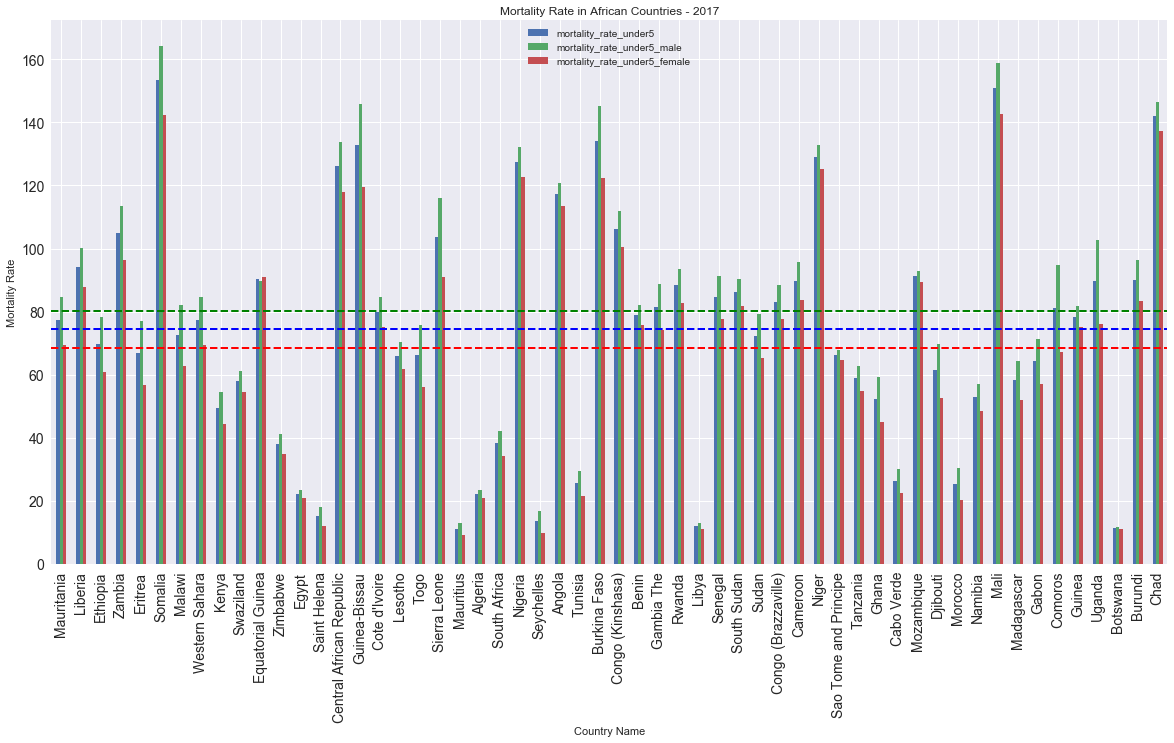

In [450]:
#plt.figure(figsize=(30,60))
df_mortality_under5_Africa_2017.plot.bar(figsize = (20,10), title = 'Mortality Rate in African Countries - 2017',
                                        fontsize = 14)
# Horizontal line are the average of mortality rate, mortality rate for male and female. colors are same as of bars
plt.axhline(df_mortality_under5_Africa_2017['mortality_rate_under5'].mean(), color='b',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_Africa_2017['mortality_rate_under5_male'].mean(),
            color='g',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_Africa_2017['mortality_rate_under5_female'].mean(),
            color='r',linestyle='dashed',linewidth=2)

plt.ylabel('Mortality Rate')
plt.xlabel('Country Name')
plt.show()


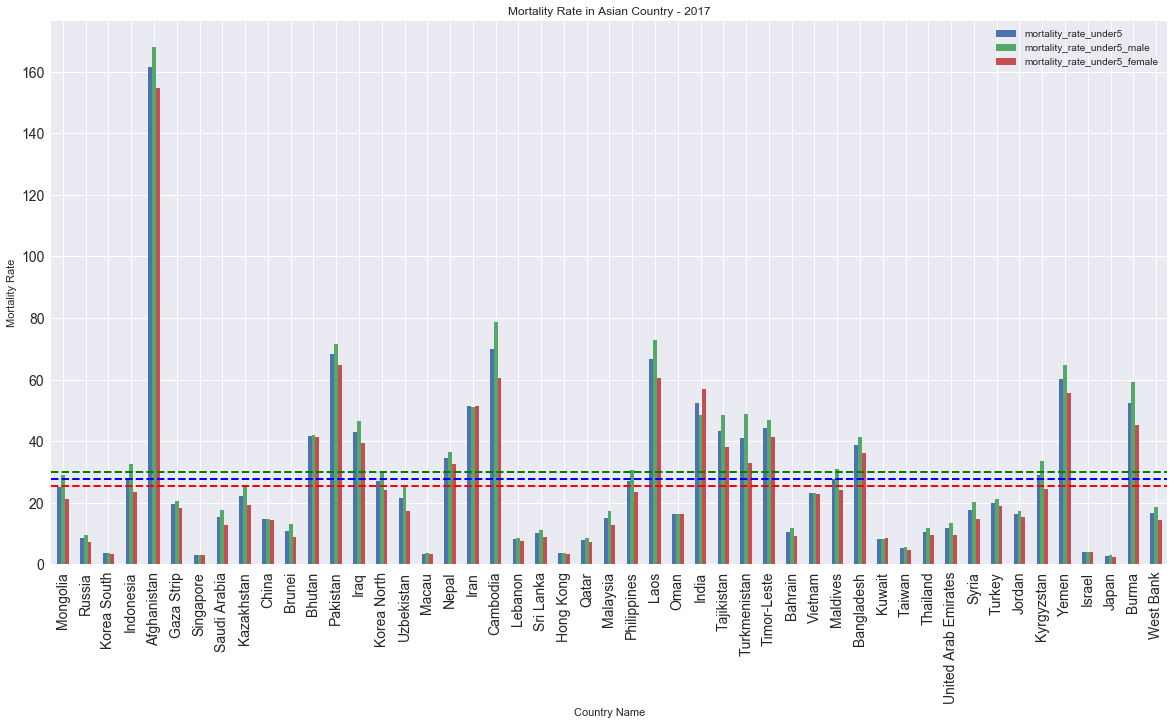

In [432]:
df_mortality_under5_Asia_2017.plot.bar(figsize = (20,10), title = 'Mortality Rate in Asian Country - 2017',
                                        fontsize = 14)
# Horizontal line are the average of mortality rate, mortality rate for male and female. colors are same as of bars
plt.axhline(df_mortality_under5_Asia_2017['mortality_rate_under5'].mean(), color='b',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_Asia_2017['mortality_rate_under5_male'].mean(),
            color='g',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_Asia_2017['mortality_rate_under5_female'].mean(),
            color='r',linestyle='dashed',linewidth=2)
plt.ylabel('Mortality Rate')
plt.xlabel('Country Name')
plt.show()


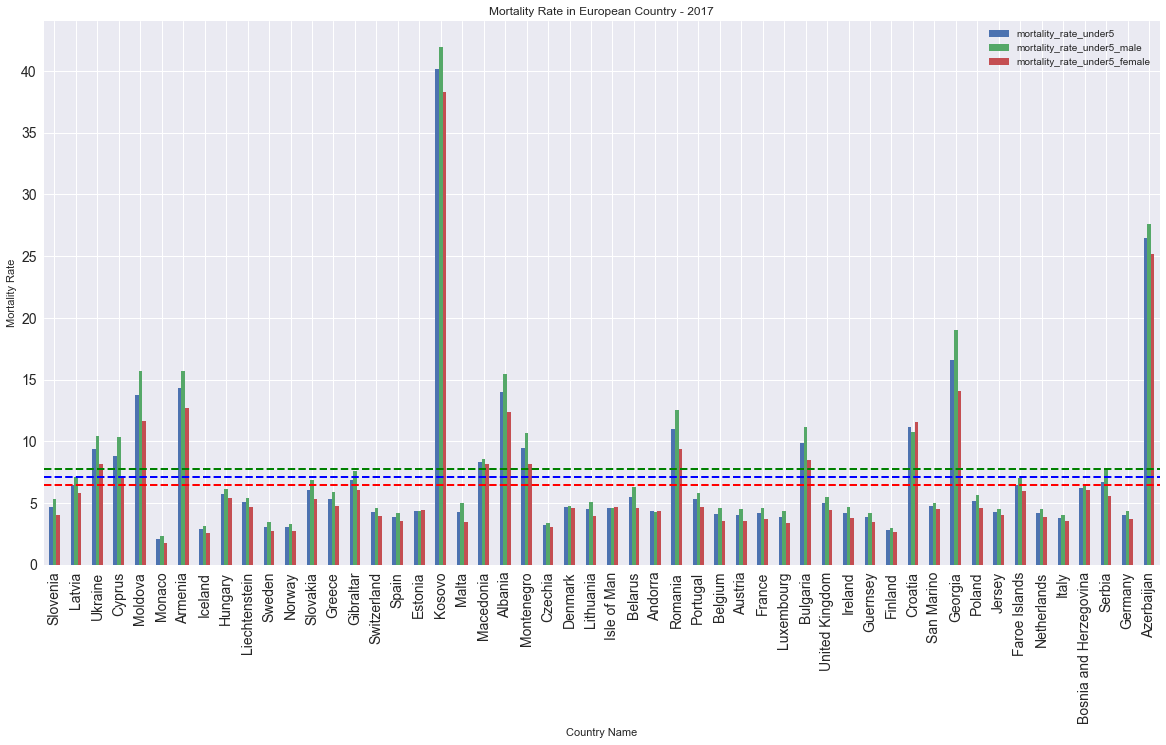

In [205]:
df_mortality_under5_Europe_2017.plot.bar(figsize = (20,10), title = 'Mortality Rate in European Country - 2017',
                                        fontsize = 14)
# Horizontal line are the average of mortality rate, mortality rate for male and female. colors are same as of bars
plt.axhline(df_mortality_under5_Europe_2017['mortality_rate_under5'].mean(), color='b',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_Europe_2017['mortality_rate_under5_male'].mean(),
            color='g',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_Europe_2017['mortality_rate_under5_female'].mean(),
            color='r',linestyle='dashed',linewidth=2)
plt.ylabel('Mortality Rate')
plt.xlabel('Country Name')
plt.show()

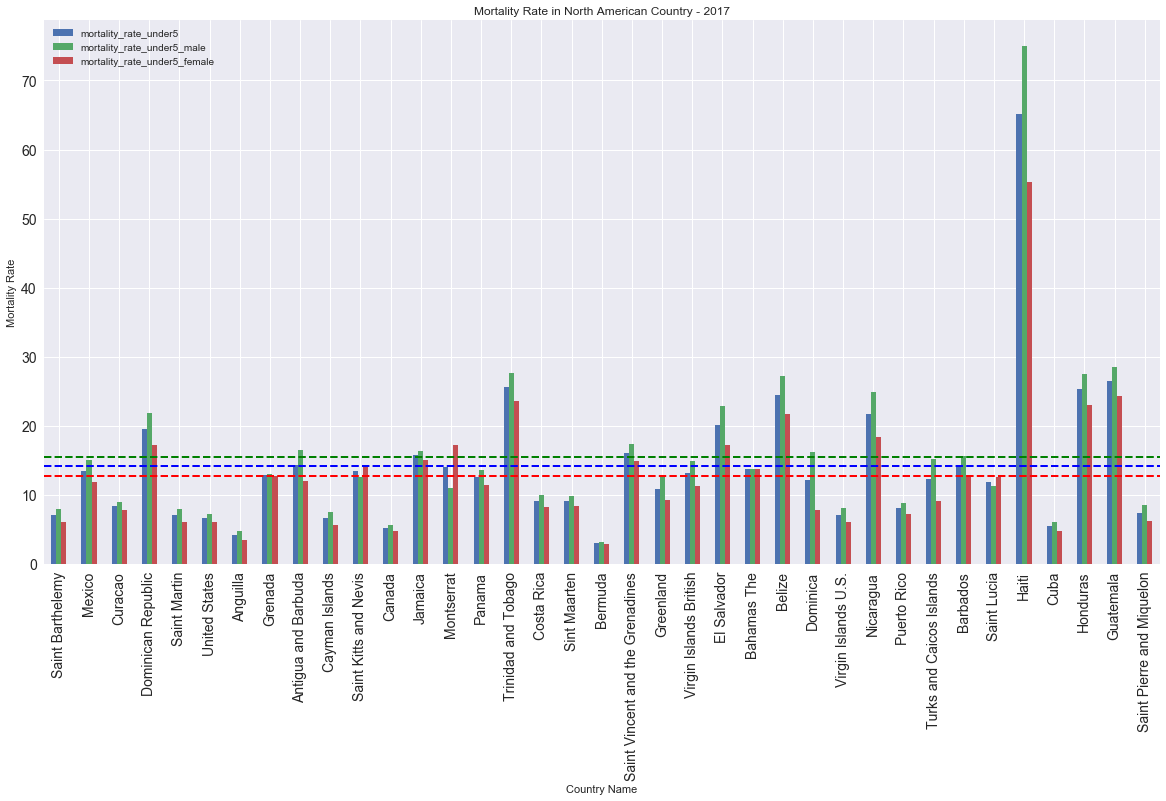

In [204]:
df_mortality_under5_NA_2017.plot.bar(figsize = (20,10), title = 'Mortality Rate in North American Country - 2017',
                                        fontsize = 14)
# Horizontal line are the average of mortality rate, mortality rate for male and female. colors are same as of bars
plt.axhline(df_mortality_under5_NA_2017['mortality_rate_under5'].mean(), color='b',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_NA_2017['mortality_rate_under5_male'].mean(),
            color='g',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_NA_2017['mortality_rate_under5_female'].mean(),
            color='r',linestyle='dashed',linewidth=2)
plt.ylabel('Mortality Rate')
plt.xlabel('Country Name')
plt.show()

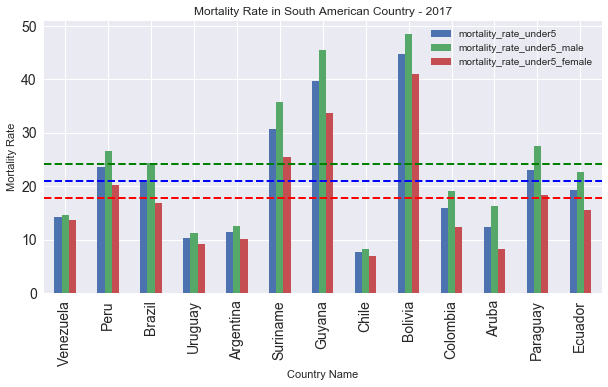

In [203]:
df_mortality_under5_SA_2017.plot.bar(figsize = (10,5), title = 'Mortality Rate in South American Country - 2017',
                                        fontsize = 14)
# Horizontal line are the average of mortality rate, mortality rate for male and female. colors are same as of bars
plt.axhline(df_mortality_under5_SA_2017['mortality_rate_under5'].mean(), color='b',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_SA_2017['mortality_rate_under5_male'].mean(),
            color='g',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_SA_2017['mortality_rate_under5_female'].mean(),
            color='r',linestyle='dashed',linewidth=2)
plt.ylabel('Mortality Rate')
plt.xlabel('Country Name')
plt.show()

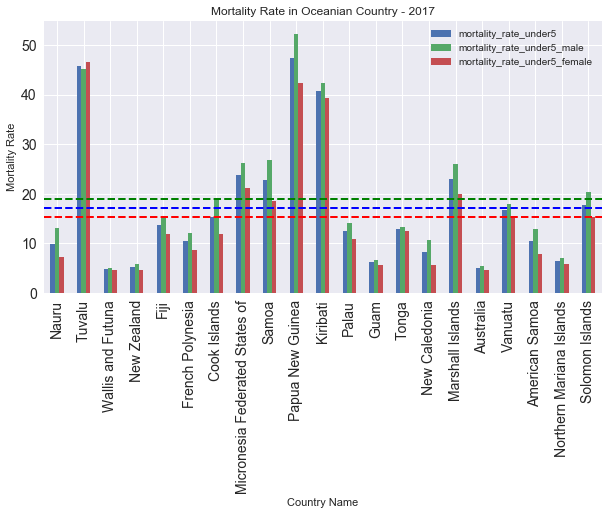

In [456]:
df_mortality_under5_Oceania_2017.plot.bar(figsize = (10,5), title = 'Mortality Rate in Oceanian Country - 2017',
                                        fontsize = 14)
# Horizontal line are the average of mortality rate, mortality rate for male and female. colors are same as of bars
plt.axhline(df_mortality_under5_Oceania_2017['mortality_rate_under5'].mean(), color='b',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_Oceania_2017['mortality_rate_under5_male'].mean(),
            color='g',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_Oceania_2017['mortality_rate_under5_female'].mean(),
            color='r',linestyle='dashed',linewidth=2)

plt.ylabel('Mortality Rate')
plt.xlabel('Country Name')
plt.show()


As we have seen in the above analysis that, compared to other continents Africa has the highest mortality rate for children under 5. The risk of a child dying before completing five years of age is highest in the African continent (81 per 1000 live births), about 7 times higher than that in the European continent (11 per 1000 live births). Many countries still have very high under-five mortality – particularly those in African continent, home to 6 of the 7 countries with an under-five mortality rate above 100 deaths per 1000 live births.Very few countries like Mauritius, Libya,  Botswana have mortality rate less than or equals to 1%(10 per 1000 live births).



**p-value test for the hypothesis.**

In [380]:
# we will take mortality rate of child under age of 5 and the normal mortality rate of Arfican continent.
# getting the nomal mortality rate in African continent.

df_death_rate_load = pd.read_csv('birth_death_growth_rates.csv')
df_death_rate.head(2)

,country_code,country_name,year,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate
0,SI,Slovenia,2036,7.59,14.65,0.23,-0.706,-0.682
1,SI,Slovenia,2022,7.52,12.28,0.32,-0.476,-0.444


In [381]:
# Adding continent to the dataframe 
#df_death_rate = (df_death_rate_load.merge(df_country_continent, how = 'left', on = 'country_name'))
df_death_rate.head(2)

,country_code,country_name,year,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate,continent
0,SI,Slovenia,2036,7.59,14.65,0.23,-0.706,-0.682,Europe
1,SI,Slovenia,2022,7.52,12.28,0.32,-0.476,-0.444,Europe


In [384]:
# grouping into continents.
df_death_rate_all = df_death_rate[['continent','country_name','year','crude_death_rate']].groupby('continent')

In [385]:
# getting death rate for african continent.
df_death_rate_africa = df_death_rate_all.get_group('Africa')

In [386]:
df_death_rate_africa.head()

,continent,country_name,year,crude_death_rate
184,Africa,Mauritania,2023,7.19
185,Africa,Mauritania,2032,6.49
186,Africa,Mauritania,2031,6.55
187,Africa,Mauritania,2030,6.61
188,Africa,Mauritania,2029,6.67


In [401]:
# getting dataframe only for year 2017.
df_death_rate_africa_2017 = df_death_rate_africa[['country_name','crude_death_rate']][
    df_death_rate_africa['year'] == 2017]
df_death_rate_africa_2017 = df_death_rate_africa_2017.set_index('country_name')
df_death_rate_africa_2017.rename(columns = {'crude_death_rate':'death_rate'}, inplace = True)
df_death_rate_africa_2017.head(2)

,death_rate
country_name,
Mauritania,7.91
Liberia,9.29


In [399]:

df_mortality_under5_Africa_2017.head(2)

,death_rate
country_name,
Mauritania,7.91
Liberia,9.29


In [404]:
df_mortality_under5_Africa_2017.head()

,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female
country_name,,,
Mauritania,77.23,84.65,69.57
Liberia,94.12,100.28,87.78
Ethiopia,69.78,78.39,60.92
Zambia,105.07,113.53,96.36
Eritrea,67.04,77.00,56.77


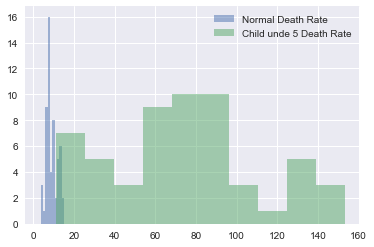

In [405]:
# Creating histograme for the two variables death rates and mortality rates for childeren under age 5
plt.hist(df_death_rate_africa_2017['death_rate'], alpha = .5, label = 'Normal Death Rate')
plt.hist(df_mortality_under5_Africa_2017['mortality_rate_under5'], alpha = .5, label = 'Child unde 5 Death Rate')
plt.legend(loc = 'best')
plt.show()


In [406]:
# now calculate the mean and sandard deviation of both the samples.
print (" The mean of children under 5 death rate = {}".format(
    df_mortality_under5_Africa_2017['mortality_rate_under5'].mean()))

print (" The mean of death rate = {}".format(
    df_death_rate_africa_2017['death_rate'].mean()))

print (" The standard deviation of children under 5 death rate = {}".format(
    df_mortality_under5_Africa_2017['mortality_rate_under5'].std()))

print (" The standard deviation of sample 2 = {}".format(df_death_rate_africa_2017['death_rate'].std()))

# calculate the difference of mean of two variables and print it.

diff = df_mortality_under5_Africa_2017['mortality_rate_under5'].mean() - df_death_rate_africa_2017['death_rate'].mean()
print ("The difference of means = {}".format(diff))

 The mean of children under 5 death rate = 74.40035714285715
 The mean of death rate = 9.00607142857143
 The standard deviation of children under 5 death rate = 37.22840357304356
 The standard deviation of sample 2 = 2.690080552069655
The difference of means = 65.39428571428572


In [409]:
# Next, calculate the standard error of the difference of the means. 
#First, create an array with the size of each variable and another with the standard deviation of each variable.

size = np.array([len(df_mortality_under5_Africa_2017.index), len(df_death_rate_africa_2017.index)])
sd = (np.array([df_mortality_under5_Africa_2017['mortality_rate_under5'].std(), 
                df_death_rate_africa_2017['death_rate'].std()]))

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 

diff_se = sum(sd ** 2 / size) ** .5

#The difference between the means divided by the standard error: T-value.  
print ("T-value = {}".format(diff/diff_se))


T-value = 13.110780649591334


Finally, we import the function ttest_ind from scipy.stats, which calculates the t-value for us (called “statistic”) and also provides the probability calculation (called “pvalue”). The t-value we calculated and the t-value given by the function may differ slightly after the hundredth decimal place. This is due to differences of rounding caused by our multiple-step approach to calculating the t-value.


In [417]:
from scipy.stats import ttest_ind
print(ttest_ind( df_mortality_under5_Africa_2017['mortality_rate_under5'], df_death_rate_africa_2017['death_rate'],
                equal_var = False))

Ttest_indResult(statistic=13.110780649591334, pvalue=1.1995163069428122e-18)


The p-value in the test I did above is really small, so we can be fairly confident that the difference in means we see is due to a real difference in the population and not due to variability in the samples.

**Hypothesis:** Children are at great risk of dying before age 5 if they are born in African countries.

POSITIVE RESULT: Children are at great risk of dying before age 5 if they are born in african countries. Null hypothesis rejected.

## Conclusion ###
We have seen that **Rwanda**, **Cambodia**, **Somalia**, **Haiti**, **Guinea** are the top 5 countries which have shown great improvement in life expectancy over the years. We have seen in our analysis that the female's life expectancy are better than male's life expectancy in the entire world. The trends show that in the year 2050 the female life expectancy would remain almost same compared to male. life expectancy overall has been increasing around the world. It was only 46 years worldwide in the early 1950s but was 69 in 2009 and is expected to reach about 75 by 2050. As life expectancy rises in poor nations, these nations will experience special problems. One problem will involve paying for the increased health care that older people in these nations will require. Because these nations are so poor, they will face even greater problems than the industrial world in paying for such care and for other programs and services their older citizens will need. 


The analysis has proved that the best age group is 25-29 in every part of the world. The second best age group for fertility rate is 20-25 except in Europe. In South America age group 20-24 and 25-29 are almost similar and we would see a significant difference only in years 2030 - 2050.

The child mortality rate in African continent is at alarming point despite efforts towards lowring it down. Inequities in child mortality between high-income and low-income countries remain large. The under-five mortality rate in low-income countries is around 10 times the average rate in high-income countries. Reducing these inequities across countries and saving more children’s lives by ending preventable child deaths are important priorities.

#### Further research and analysis ####
Based on current trends, how long will it take each country to catch up to today’s best performers? (using regression analysis).Within African continent which are the countries have worst mortality rate of the child under age of 5? Are these countries are considered as poor countries? If so, the child mortality rate under age 5 in poor countries, in other continents are same?